TODO: 1. order of kernels 2. dict补全 3. plt remove title, pop table

# Kernel Types

Let's try different kernel types.

## Response Pattern

Show how each kernel varies with pairwise-point-distances.

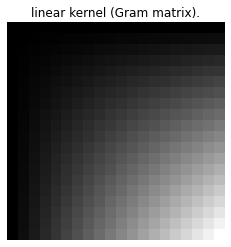

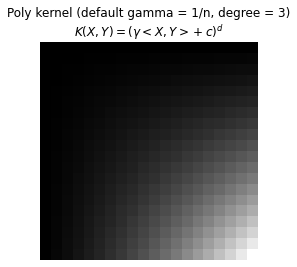

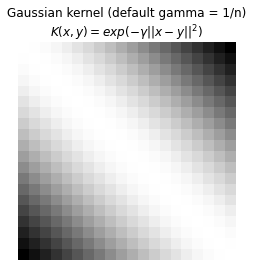

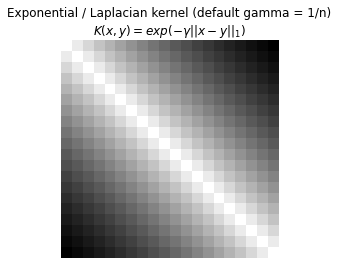

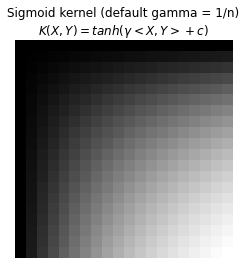

None


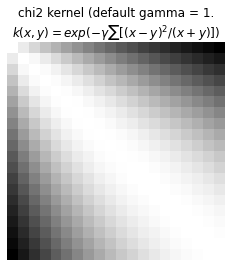

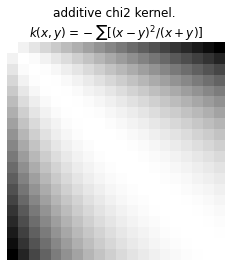

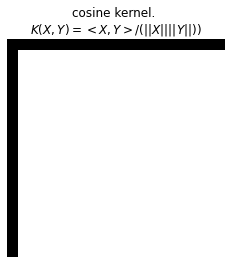

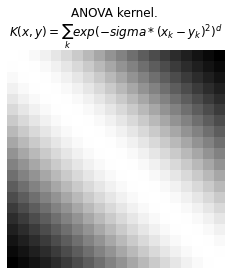

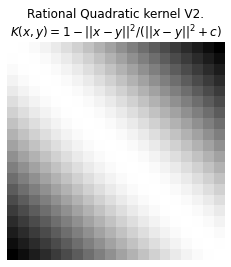

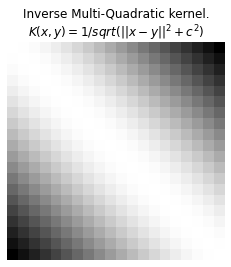

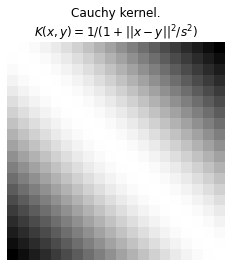

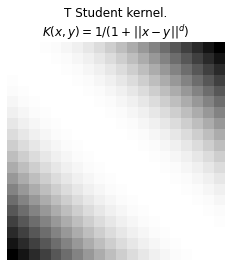

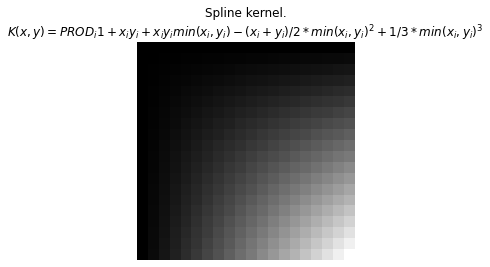

C:\Users\eleve\Documents\codex\py\machine learning\source\19. Kernel\github\src\ackl\kernels.py:685: RuntimeWarning: invalid value encountered in true_divide
  return 2 * prod / (norm_1 + norm_2.T)


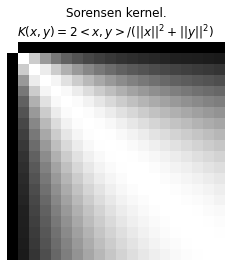

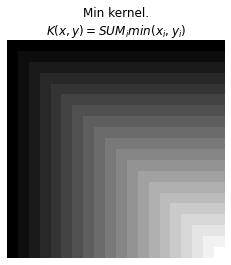

C:\Users\eleve\Documents\codex\py\machine learning\source\19. Kernel\github\src\ackl\kernels.py:837: RuntimeWarning: invalid value encountered in true_divide
  return minkernel/maxkernel


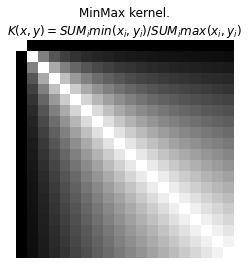

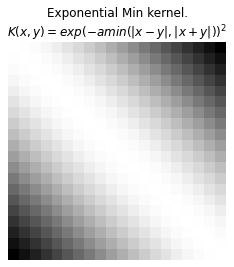

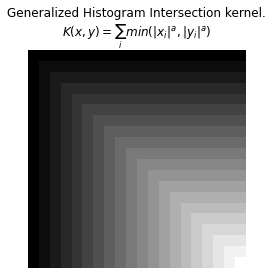

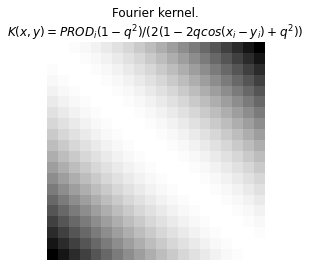

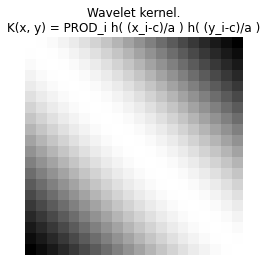

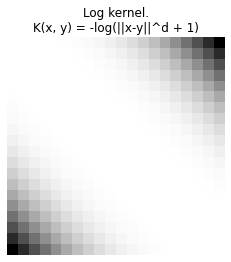

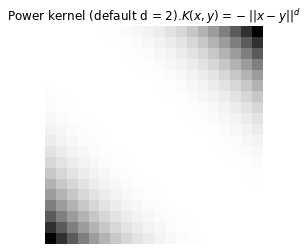

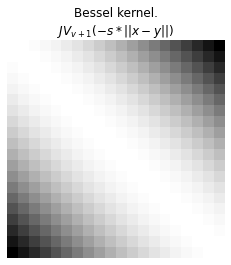

C:\Users\eleve\Documents\codex\py\machine learning\source\19. Kernel\github\src\ackl\kernels.py:131: RuntimeWarning: divide by zero encountered in true_divide
  return np.sqrt (math.pi / (2*x)) * np.exp(-x)
C:\Users\eleve\Documents\codex\py\machine learning\source\19. Kernel\github\src\ackl\kernels.py:128: RuntimeWarning: invalid value encountered in multiply
  return 1/(math.gamma(v) * 2**(v-1) ) * (z**v) * mod_bessel(z)


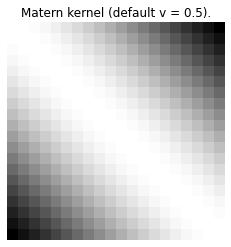

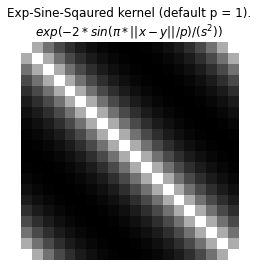

Check Implementation


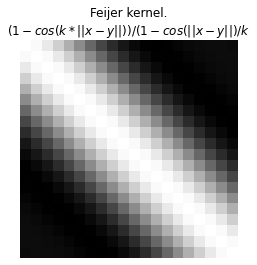

In [1]:
%run ./src/ackl/metrics.py
linear_response_pattern(20)

## Binary Response Pattern

       0      1 
    0  k(0,0) k(0,1)
    1  k(1,0) k(1,1)

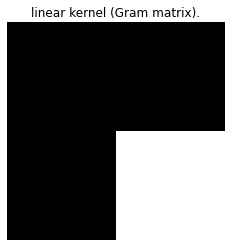

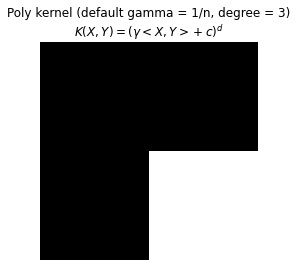

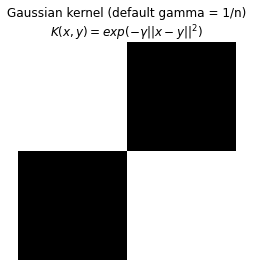

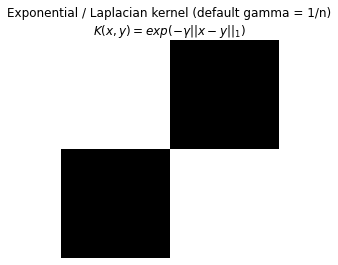

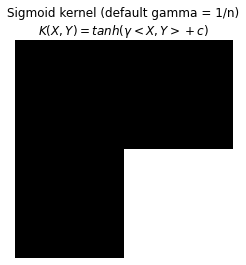

None


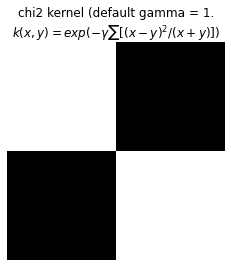

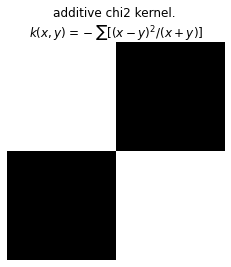

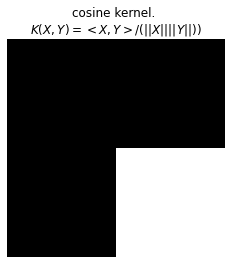

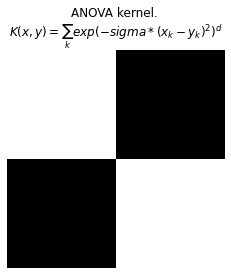

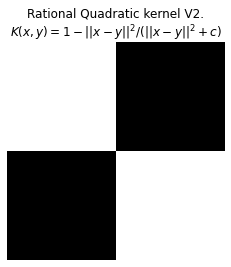

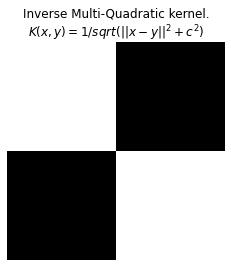

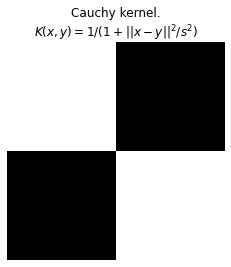

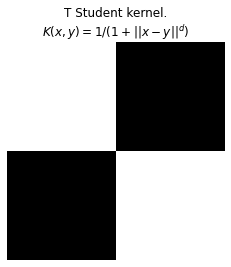

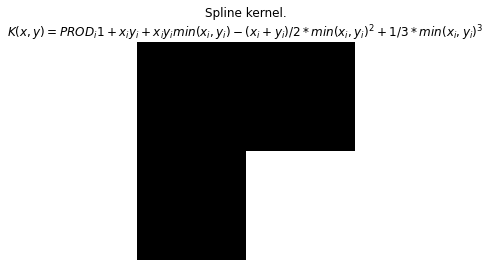

C:\Users\eleve\Documents\codex\py\machine learning\source\19. Kernel\github\src\ackl\kernels.py:685: RuntimeWarning: invalid value encountered in true_divide
  return 2 * prod / (norm_1 + norm_2.T)


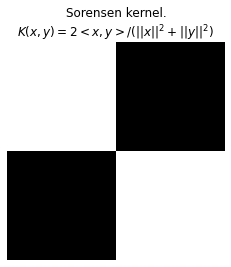

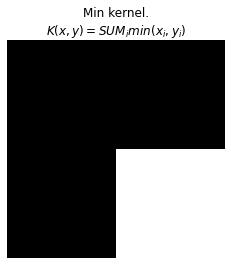

C:\Users\eleve\Documents\codex\py\machine learning\source\19. Kernel\github\src\ackl\kernels.py:837: RuntimeWarning: invalid value encountered in true_divide
  return minkernel/maxkernel


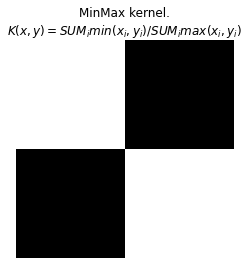

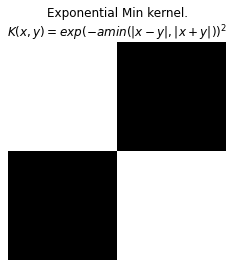

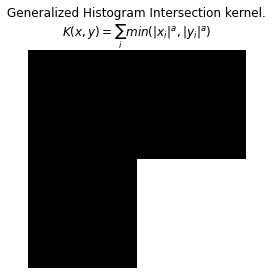

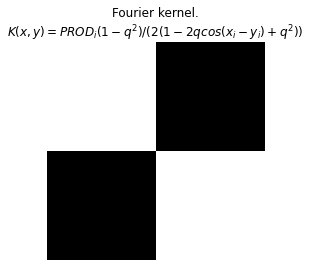

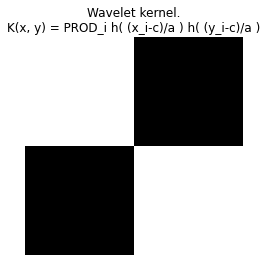

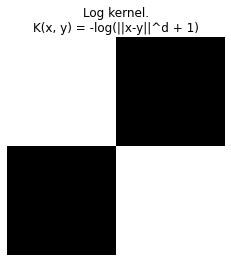

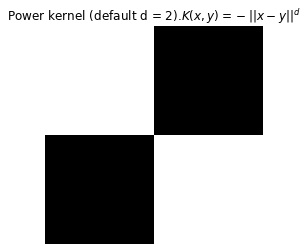

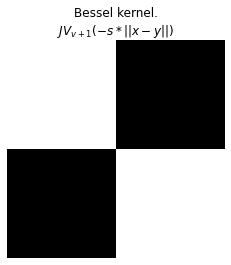

C:\Users\eleve\Documents\codex\py\machine learning\source\19. Kernel\github\src\ackl\kernels.py:131: RuntimeWarning: divide by zero encountered in true_divide
  return np.sqrt (math.pi / (2*x)) * np.exp(-x)
C:\Users\eleve\Documents\codex\py\machine learning\source\19. Kernel\github\src\ackl\kernels.py:128: RuntimeWarning: invalid value encountered in multiply
  return 1/(math.gamma(v) * 2**(v-1) ) * (z**v) * mod_bessel(z)


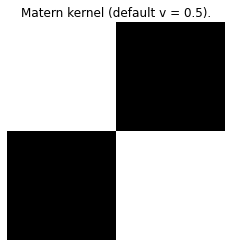

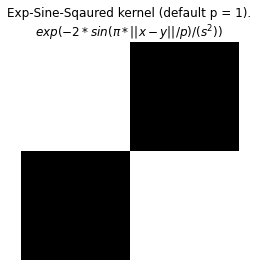

Check Implementation


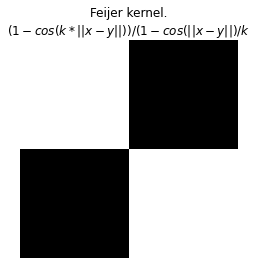

In [2]:
Xns = np.array([0,1]).reshape(-1,1)
binary_response_pattern()

# Real Dataset Experiments

load dataset from 754b_C2S_Shihu.txt
X.shape (232, 877)  y.shape (232,)


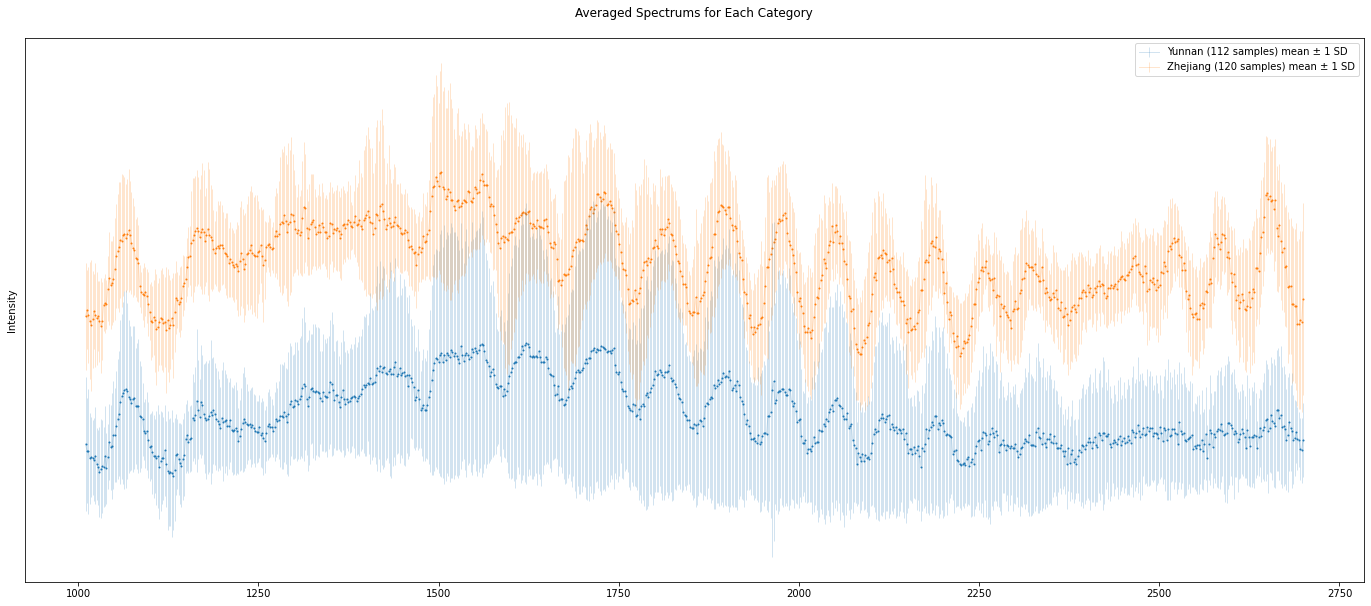

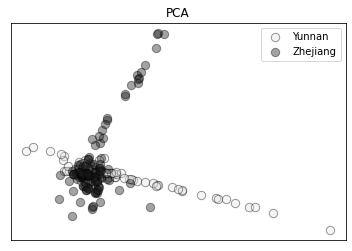

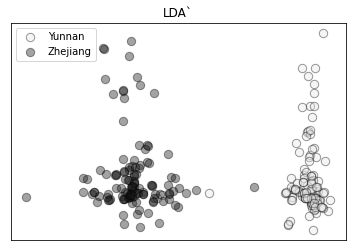

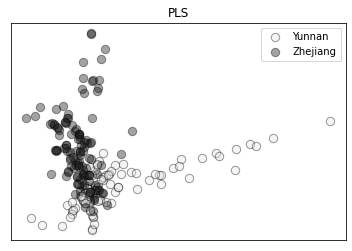

Data Set ID: 754b 铁皮石斛拉曼光谱

[云南，浙江温州]

C1 - Yunan Province (112 samples)
C2 - Wenzhou, Zhejiang Province (120 samples)

铁皮石斛拉曼光谱采集
（1）采集磐安、乐青、云南等多个产地的铁皮石斛干品样本，每个产地收集m份，样品经中药高速粉碎机成粉末样品，过200目筛后放入自封袋保存备用。
（2）实验采用美国Thermofisher公司生产的DXR2xi型显微拉曼光谱仪，拉曼光谱系统的激发波长为785nm，测量范围为50～3400 cm-1，激光功率30 mW，曝光时间0.5 s，扫描次数1000次。待测样品粉末平铺于载玻片上制成厚度均匀的片状样品后置于载物台上进行拉曼光谱采集。


In [1]:
from qsi import io
X, y, X_names, desc, labels = io.load_dataset('shihu_c2', shift = 500)

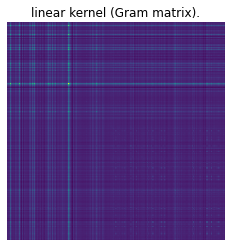

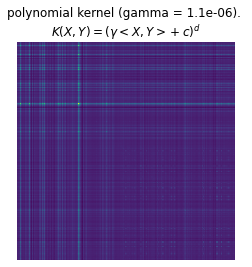

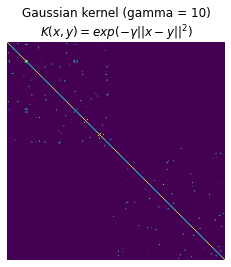

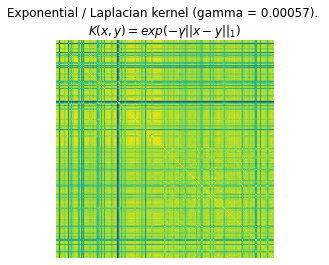

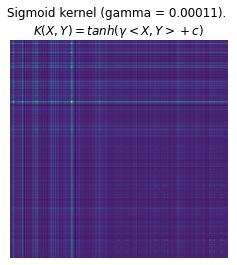

0.001


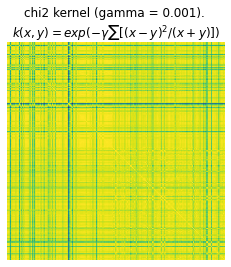

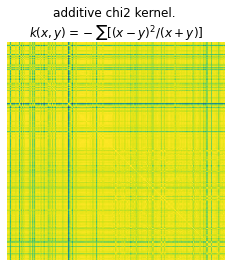

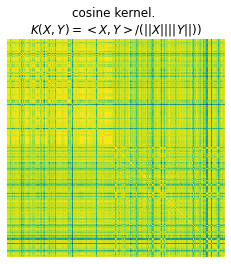

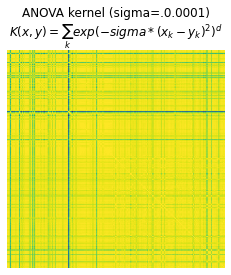

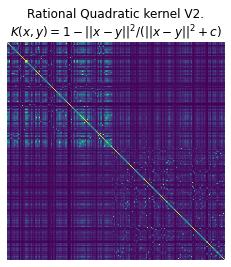

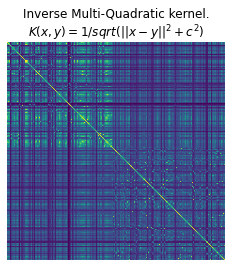

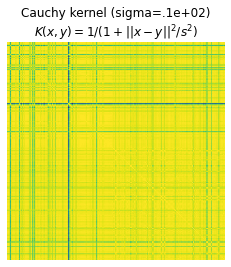

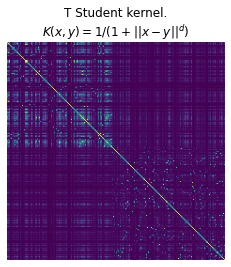

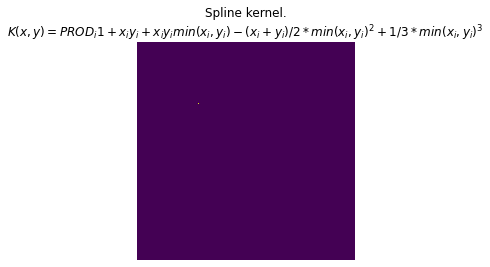

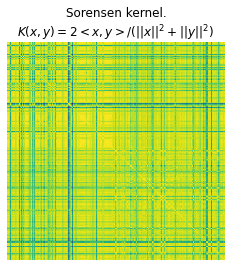

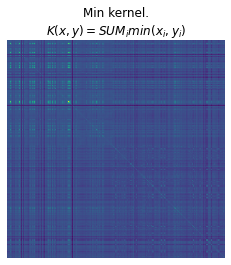

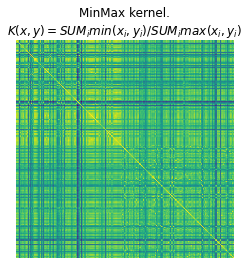

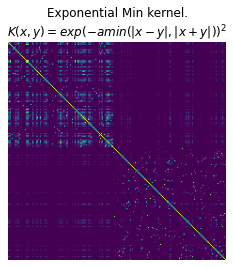

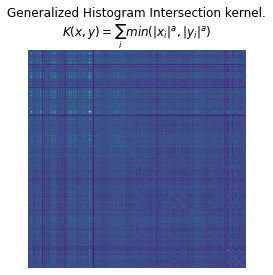

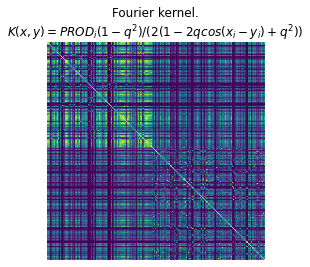

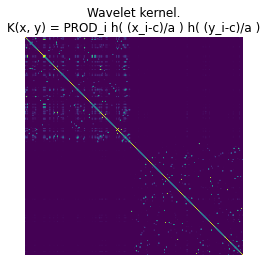

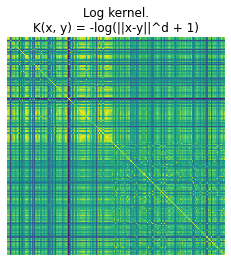

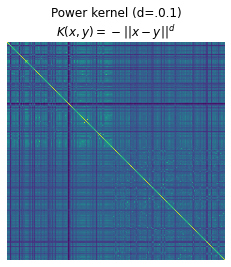

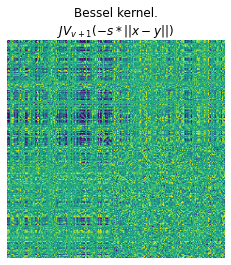

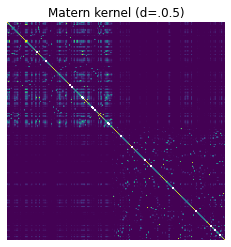

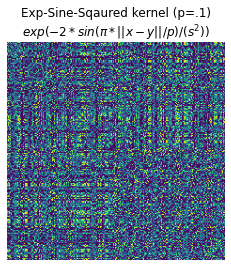

Check Implementation


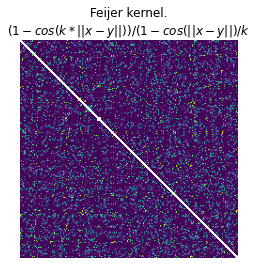

In [3]:
%run ./github/src/ackl/metrics.py
preview_kernels(X,y)

下面的不用管

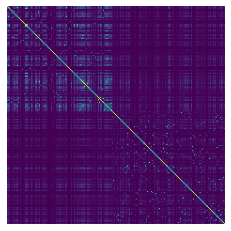

In [20]:
Xs = MinMaxScaler().fit_transform(X)
M = laplacian_kernel(Xs,Xs,0.05)
plt.imshow(M)
plt.axis('off')
plt.show()

## 2. Polynomial Kernel

The Polynomial kernel is a non-stationary kernel. Polynomial kernels are well suited for problems where all the training data is normalized.

$ k(x, y) = (\alpha x^T y + c)^d $

Adjustable parameters are the slope alpha, the constant term c and the polynomial degree d.


## 3. The radial basis funciton kernels

A radial basis funciton is a real-valued function whose value depends only the distance from the origin (or another landmark point)

$ \Phi(x,y) = \Phi(||x-y||) $

Sums of radial basis functions can be used to approximate a given function. **e.g., [KDE (Kernel Density Estimation)](../../../statistics/non_parametric_test.ipynb)**


### 3.1. Gaussian Kernel

The Gaussian kernel is an example of radial basis function kernel.

$ k(x, y) = \exp\left(-\frac{ \lVert x-y \rVert ^2}{2\sigma^2}\right) $

Alternatively, it could also be implemented using

$ k(x, y) = \exp\left(- \gamma \lVert x-y \rVert ^2 \right ) $

The adjustable parameter sigma plays a major role in the performance of the kernel, and should be carefully tuned to the problem at hand. If overestimated, the exponential will behave almost linearly and the higher-dimensional projection will start to lose its non-linear power. In the other hand, if underestimated, the function will lack regularization and the decision boundary will be highly sensitive to noise in training data.


### 3.3. Exponential / Laplacian Kernel

The Laplace Kernel is completely equivalent to the exponential kernel, except for being less sensitive for changes in the sigma parameter. Being equivalent, it is also a radial basis function kernel.

$ k(x, y) = \exp\left(- \frac{\lVert x-y \rVert }{\sigma}\right) $

It is important to note that the observations made about the sigma parameter for the Gaussian kernel also apply to the Exponential and Laplacian kernels.


### Matern kernel



### 3.7. ANOVA Kernel

The ANOVA kernel is also a radial basis function kernel, just as the Gaussian and Laplacian kernels. It is said to perform well in multidimensional regression problems (Hofmann, 2008).

$ k(x, y) = \sum_{k=1}^n \exp (-\sigma (x^k - y^k)^2)^d $

### 3.8. T-Student Kernel

The Generalized T-Student Kernel has been proven to be a **Mercel Kernel**, thus having a **positive semi-definite Kernel** matrix (Boughorbel, 2004). It is given by:

$ k(x,y) = \frac{1}{1 + \lVert x-y \rVert ^d} $

### 3.9. Cauchy Kernel

The Cauchy kernel comes from the Cauchy distribution (Basak, 2008). It is a long-tailed kernel and can be used to give long-range influence and sensitivity over the high dimension space.

$ k(x, y) = \frac{1}{1 + \frac{\lVert x-y \rVert^2}{\sigma} } $ 

### 3.10. Circular Kernel

The circular kernel comes from a statistics perspective. It is an example of an isotropic stationary kernel and is positive definite in $R^2$.

$ k(x, y) = \frac{2}{\pi} \arccos ( - \frac{ \lVert x-y \rVert}{\sigma}) - \frac{2}{\pi} \frac{ \lVert x-y \rVert}{\sigma} \sqrt{1 - \left(\frac{ \lVert x-y \rVert^2}{\sigma} \right)} $ 

$ \mbox{if}~ \lVert x-y \rVert < \sigma \mbox{, zero otherwise} $

### 3.11. Spherical Kernel

The spherical kernel is similar to the circular kernel, but is positive definite in $R^3$.

$ k(x, y) = 1 - \frac{3}{2} \frac{\lVert x-y \rVert}{\sigma} + \frac{1}{2} \left( \frac{ \lVert x-y \rVert}{\sigma} \right)^3 $

$ \mbox{if}~ \lVert x-y \rVert < \sigma \mbox{, zero otherwise} $

### 3.12. Wave Kernel

The Wave kernel is also symmetric positive semi-definite (Huang, 2008).

$ k(x, y) = \frac{\theta}{\lVert x-y \rVert } \sin \frac{\lVert x-y \rVert }{\theta} $

### 3.13. Power Kernel

The Power kernel is also known as the (unrectified) triangular kernel. It is an example of scale-invariant kernel (Sahbi and Fleuret, 2004) and is also only conditionally positive definite.

$ k(x,y) = - \lVert x-y \rVert ^d $

### 3.14. Log Kernel

The Log kernel seems to be particularly interesting for images, but is only conditionally positive definite.

$ k(x,y) = - log (\lVert x-y \rVert ^d + 1) $


## 4. Cosine Kernel

$ k(x, y) = cosine(x,y) = { x^T y \over ||x|| ||y|| } $

cosine_similarity computes the L2-normalized dot product of vectors.  
**On L2-normalized data, the cosine kernel is equivalent to linear_kernel.**

## 5. Hyperbolic Tangent (Sigmoid) Kernel

The Hyperbolic Tangent Kernel is also known as the Sigmoid Kernel and as the Multilayer Perceptron (MLP) kernel. The Sigmoid Kernel comes from the Neural Networks field, where the bipolar sigmoid function is often used as an activation function for artificial neurons.

$ k(x, y) = \tanh (\alpha x^T y + c) $

It is interesting to note that **a SVM model using a sigmoid kernel function is equivalent to a two-layer, perceptron neural network.** This kernel was quite popular for support vector machines due to its origin from neural network theory. Also, despite being only conditionally positive definite, it has been found to perform well in practice.

There are two adjustable parameters in the sigmoid kernel, the slope alpha and the intercept constant c. A common value for alpha is 1/N, where N is the data dimension. A more detailed study on sigmoid kernels can be found in the works by Hsuan-Tien and Chih-Jen.


## 6. Chi-Square Kernel

The Chi-Square kernel comes from the Chi-Square distribution.

$ k(x,y) = 1 - \sum_{i=1}^n \frac{(x_i-y_i)^2}{\frac{1}{2}(x_i+y_i)} $

## 7. Histogram Intersection Kernel

The Histogram Intersection Kernel is also known as the Min Kernel and has been proven useful in image classification.

$ k(x,y) = \sum_{i=1}^n \min(x_i,y_i) $

## 8. Generalized Histogram Intersection

The Generalized Histogram Intersection kernel is built based on the Histogram Intersection Kernel for image classification but applies in a much larger variety of contexts (Boughorbel, 2005). It is given by:

$ k(x,y) = \sum_{i=1}^m \min(|x_i|^\alpha,|y_i|^\beta) $

## 9. Bayesian Kernel

The Bayesian kernel could be given as:

$ k(x,y) = \prod_{l=1}^N \kappa_l (x_l,y_l) $

where

$ \kappa_l(a,b) = \sum_{c \in \{0;1\}} P(Y=c \mid X_l=a) ~ P(Y=c \mid X_l=b) $

However, it really depends on the problem being modeled. For more information, please see the work by Alashwal, Deris and Othman, in which they used a SVM with Bayesian kernels in the prediction of protein-protein interactions.

## 10. Wavelet Kernel

The Wavelet kernel (Zhang et al, 2004) comes from Wavelet theory and is given as:

$ k(x,y) = \prod_{i=1}^N h(\frac{x_i-c_i}{a}) \: h(\frac{y_i-c_i}{a}) $

Where a and c are the wavelet dilation and translation coefficients, respectively (the form presented above is a simplification, please see the original paper for details). A translation-invariant version of this kernel can be given as:

$ k(x,y) = \prod_{i=1}^N h(\frac{x_i-y_i}{a}) $

Where in both h(x) denotes a mother wavelet function. In the paper by Li Zhang, Weida Zhou, and Licheng Jiao, the authors suggests a possible h(x) as:

$ h(x) = cos(1.75x)exp(-\frac{x^2}{2}) $

Which they also prove as an admissible kernel function.


## others

 6. Spline Kernel

The Spline kernel is given as a piece-wise cubic polynomial, as derived in the works by Gunn (1998).

$ k(x, y) = 1 + xy + xy~min(x,y) - \frac{x+y}{2}~min(x,y)^2+\frac{1}{3}\min(x,y)^3 $

However, what it actually mean is:

$ k(x,y) = \prod_{i=1}^d 1 + x_i y_i + x_i y_i \min(x_i, y_i) - \frac{x_i + y_i}{2} \min(x_i,y_i)^2 + \frac{\min(x_i,y_i)^3}{3} $

With $ x,y \in R^d $

 7. B-Spline (Radial Basis Function) Kernel

The B-Spline kernel is defined on the interval [−1, 1]. It is given by the recursive formula:

$ k(x,y) = B_{2p+1}(x-y) $

$ \mbox{where~} p \in N \mbox{~with~} B_{i+1} := B_i \otimes B_0. $

In the work by Bart Hamers it is given by:k(x, y) = \prod_{p=1}^d B_{2n+1}(x_p - y_p)

Alternatively, Bn can be computed using the explicit expression (Fomel, 2000):

$ B_n(x) = \frac{1}{n!} \sum_{k=0}^{n+1} \binom{n+1}{k} (-1)^k (x + \frac{n+1}{2} - k)^n_+ $

Where x+ is defined as the truncated power function:

x^d_+ = \begin{cases} x^d, & \mbox{if }x > 0 \\ 0, & \mbox{otherwise} \end{cases}

8. Bessel Kernel

The Bessel kernel is well known in the theory of function spaces of fractional smoothness. It is given by:

$ k(x, y) = \frac{J_{v+1}( \sigma \lVert x-y \rVert)}{ \lVert x-y \rVert ^ {-n(v+1)} } $

where J is the Bessel function of first kind. However, in the Kernlab for R documentation, the Bessel kernel is said to be:

k(x,x') = - Bessel_{(nu+1)}^n (\sigma |x - x'|^2)

### Matern

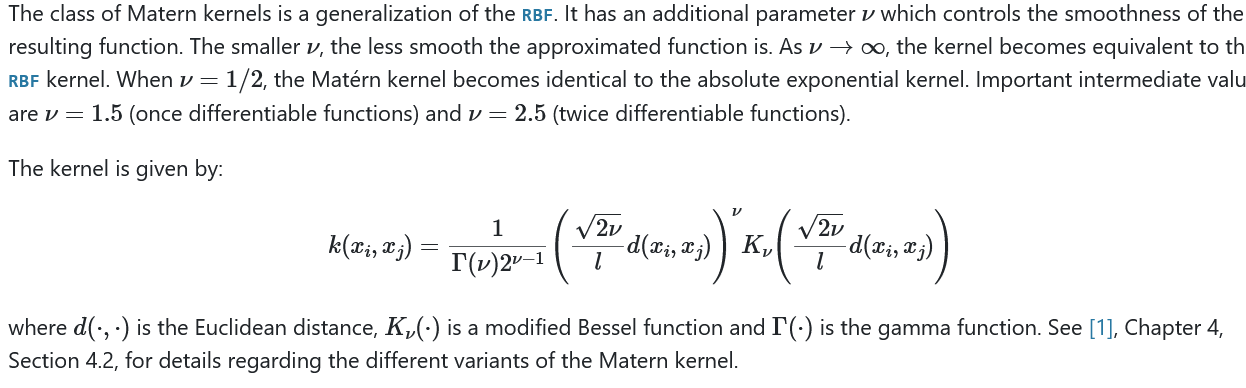

### Exp-Sine-Squared kernel (aka periodic kernel).

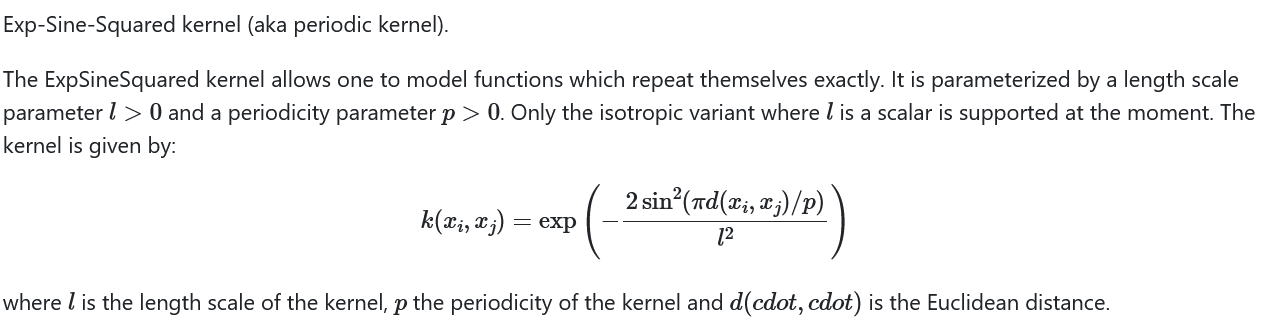

### 3.2. Exponential Kernel

The exponential kernel is closely related to the Gaussian kernel, with only the square of the norm left out. It is also a radial basis function kernel.

$ k(x, y) = \exp\left(-\frac{ \lVert x-y \rVert }{2\sigma^2}\right) $


### 3.4. Rational Quadratic Kernel

The Rational Quadratic kernel is less computationally intensive than the Gaussian kernel and can be used as an alternative when using the Gaussian becomes too expensive.

$ k(x, y) = 1 - \frac{\lVert x-y \rVert^2}{\lVert x-y \rVert^2 + c} $

### 3.5. Multiquadric Kernel

The Multiquadric kernel can be used in the same situations as the Rational Quadratic kernel. As is the case with the Sigmoid kernel, it is also an example of an non-positive definite kernel.

$ k(x, y) = \sqrt{\lVert x-y \rVert^2 + c^2} $

### 3.6. Inverse Multiquadric Kernel

The Inverse Multi Quadric kernel. As with the Gaussian kernel, it results in a kernel matrix with full rank (Micchelli, 1986) and thus forms a infinite dimension feature space.

$ k(x, y) = \frac{1}{\sqrt{\lVert x-y \rVert^2 + \theta^2}} $

In [4]:
import pywt
pywt.wavelist()

['bior1.1',
 'bior1.3',
 'bior1.5',
 'bior2.2',
 'bior2.4',
 'bior2.6',
 'bior2.8',
 'bior3.1',
 'bior3.3',
 'bior3.5',
 'bior3.7',
 'bior3.9',
 'bior4.4',
 'bior5.5',
 'bior6.8',
 'cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'coif1',
 'coif2',
 'coif3',
 'coif4',
 'coif5',
 'coif6',
 'coif7',
 'coif8',
 'coif9',
 'coif10',
 'coif11',
 'coif12',
 'coif13',
 'coif14',
 'coif15',
 'coif16',
 'coif17',
 'db1',
 'db2',
 'db3',
 'db4',
 'db5',
 'db6',
 'db7',
 'db8',
 'db9',
 'db10',
 'db11',
 'db12',
 'db13',
 'db14',
 'db15',
 'db16',
 'db17',
 'db18',
 'db19',
 'db20',
 'db21',
 'db22',
 'db23',
 'db24',
 'db25',
 'db26',
 'db27',
 'db28',
 'db29',
 'db30',
 'db31',
 'db32',
 'db33',
 'db34',
 'db35',
 'db36',
 'db37',
 'db38',
 'dmey',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'haar',
 'mexh',
 'morl',
 'rbio1.1',
 'rbio1.3',
 'rbio1.5',
 'rbio2.2',
 'rbio2.4',
 'rbio2.6',
 'rbio2.8',
 'rbio3.1',

# 核密度估计（kernel density estimation, KDE）- Application in non-parametric estimation

核密度估计（kernel density estimation）是在概率论中用来估计未知的密度函数，属于非参数检验方法之一，由Rosenblatt (1955)和Emanuel Parzen(1962)提出，又名Parzen窗（Parzen window）.核密度函数的原理比较简单，在我们知道某一事物的概率分布的情况下，如果某一个数在观察中出现了，我们可以认为这个数的概率密度很大，和这个数比较近的数的概率密度也会比较大，而那些离这个数远的数的概率密度会比较小

所谓核密度估计，就是采用平滑的峰值函数(“核”)来拟合观察到的数据点，从而对真实的概率分布曲线进行模拟。x1,x2,x3... 为独立同分布F的n个样本点，设其概率密度函数为f，核密度估计为以下：

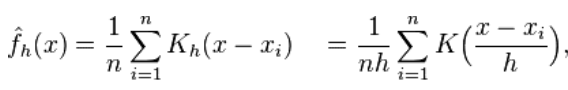

K(.)为核函数（非负、积分为1，符合概率密度性质）

h>0为一个平滑参数，称作带宽(bandwidth)或窗口(window)。

Kh(x) = 1/h K(x/h). 为缩放核函数(scaled Kernel)。 如果带宽不是固定的，其变化取决于估计的位置或样本点（逐点估计pointwise estimator），由此可以产产生一个非常强大的方法称为自适应或可变带宽核密度估计。

## Case Study 1: Two normal distributions 

(1000, 1)


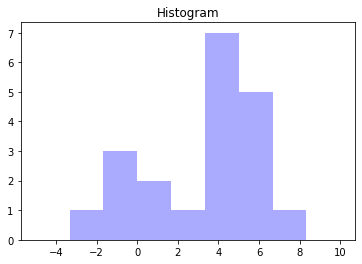

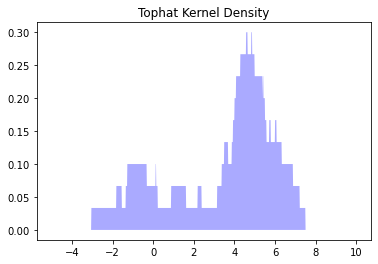

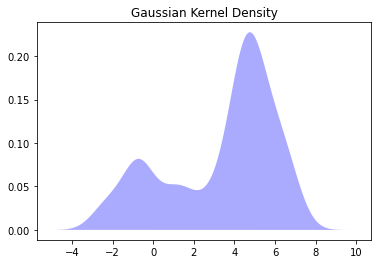

In [34]:
# Author: Jake Vanderplas <jakevdp@cs.washington.edu>
#
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

np.random.seed(1)
N = 20
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]

X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]
print(X_plot.shape)
bins = np.linspace(-5, 10, 10)


# histogram 1
plt.figure()
plt.hist(X[:, 0], bins=bins, fc='#AAAAFF')
plt.title("Histogram")
plt.show()

# tophat KDE
plt.figure()
kde = KernelDensity(kernel='tophat', bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
plt.fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
plt.title("Tophat Kernel Density")
plt.show()

# Gaussian KDE
plt.figure()
kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
plt.fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
plt.title("Gaussian Kernel Density")
plt.show()

Text(0.5, 1.0, 'Available Kernels')

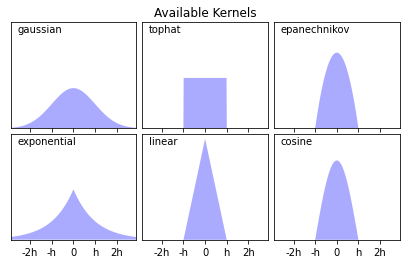

In [36]:
# Plot all available kernels
X_plot = np.linspace(-6, 6, 1000)[:, None]
X_src = np.zeros((1, 1))

fig, ax = plt.subplots(2, 3, sharex=True, sharey=True)
fig.subplots_adjust(left=0.05, right=0.95, hspace=0.05, wspace=0.05)


def format_func(x, loc):
    if x == 0:
        return '0'
    elif x == 1:
        return 'h'
    elif x == -1:
        return '-h'
    else:
        return '%ih' % x

for i, kernel in enumerate(['gaussian', 'tophat', 'epanechnikov',
                            'exponential', 'linear', 'cosine']):
    axi = ax.ravel()[i]
    log_dens = KernelDensity(kernel=kernel).fit(X_src).score_samples(X_plot)
    axi.fill(X_plot[:, 0], np.exp(log_dens), '-k', fc='#AAAAFF')
    axi.text(-2.6, 0.95, kernel)

    axi.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
    axi.xaxis.set_major_locator(plt.MultipleLocator(1))
    axi.yaxis.set_major_locator(plt.NullLocator())

    axi.set_ylim(0, 1.05)
    axi.set_xlim(-2.9, 2.9)

ax[0, 1].set_title('Available Kernels')

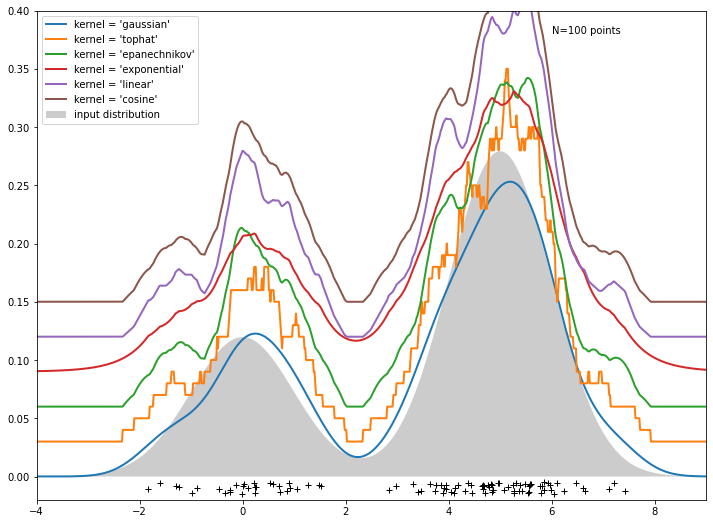

In [48]:
N = 100
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]

X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

true_dens = (0.3 * norm(0, 1).pdf(X_plot[:, 0])
             + 0.7 * norm(5, 1).pdf(X_plot[:, 0]))

fig, ax = plt.subplots(figsize = (12,9))
ax.fill(X_plot[:, 0], true_dens, fc='black', alpha=0.2,
        label='input distribution')
colors = ['navy', 'cornflowerblue', 'darkorange']
kernels = ['gaussian', 'tophat', 'epanechnikov','exponential', 'linear', 'cosine']
lw = 2

for idx,kernel in enumerate(kernels):
    kde = KernelDensity(kernel=kernel, bandwidth=0.5).fit(X)
    log_dens = kde.score_samples(X_plot)
    ax.plot(X_plot[:, 0], idx*0.03 + np.exp(log_dens), lw=lw,
            linestyle='-', label="kernel = '{0}'".format(kernel)) # color=color

ax.text(6, 0.38, "N={0} points".format(N))

ax.legend(loc='upper left')
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')

ax.set_xlim(-4, 9)
ax.set_ylim(-0.02, 0.4)
plt.show()

gaussian kernel has the smoothest PDF curve.

## Case Study 2: digits

This example trains generative models. Similar to VAE.

In [27]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.neighbors import KernelDensity
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

def KDE_on_digits(K = 1):
    
    # load the data
    digits = load_digits()

    # project the 64-dimensional data to a lower dimension
    pca = PCA(n_components=K, whiten=False)
    data = pca.fit_transform(digits.data)

    # use grid search cross-validation to optimize the bandwidth
    params = {'bandwidth': np.logspace(-1, 1, 20)}
    grid = GridSearchCV(KernelDensity(), params)
    grid.fit(data)

    print("best bandwidth: {0}".format(grid.best_estimator_.bandwidth))

    # use the best estimator to compute the kernel density estimate
    kde = grid.best_estimator_

    # plot pdf
    if (K == 1):
        plt.figure(figsize = (20,4))
        X_plot = np.linspace(data.min(), data.max(), 1000)[:, None]
        log_dens = kde.score_samples(X_plot)
        plt.plot(np.exp(log_dens), color=color, lw=lw,
                linestyle='-', label="kernel = '{0}'".format(kernel))
        plt.title('PDF')
        plt.show()
    elif (K == 2):
        # Create grid and multivariate normal

        X, Y = np.meshgrid(np.linspace(data[:,0].min(), data[:,0].max(), 100),
                           np.linspace(data[:,0].min(), data[:,1].max(), 100))
        log_dens = kde.score_samples(np.array([X.flatten(), Y.flatten()]).T) # here, we need to input a (:,2) shape matrix
        Z = np.exp(log_dens).reshape(X.shape) # reshape to the 2D shape

        fig = plt.figure(figsize=(10, 8))
        ax = fig.gca(projection='3d')
        ax.plot_surface(X, Y, Z,cmap='Reds',linewidth=0, antialiased=True, zorder = 0.5)
        plt.title('PDF')
        plt.show()
        
        fig = plt.figure(figsize=(10, 8))
        plt.title('PDF')
        plt.contourf(X, Y, Z, 8, alpha=.75, cmap='gray_r')       
        plt.show()
    else:
        print('Dimension > 2. Skip PDF visualzation.')

    # sample 44 new points from the data
    new_data = kde.sample(44, random_state=0)
    new_data = pca.inverse_transform(new_data)

    # turn data into a 4x11 grid
    new_data = new_data.reshape((4, 11, -1))
    real_data = digits.data[:44].reshape((4, 11, -1))

    # plot real digits and resampled digits
    fig, ax = plt.subplots(9, 11, subplot_kw=dict(xticks=[], yticks=[]), figsize = (9,11))
    for j in range(11):
        ax[4, j].set_visible(False)
        for i in range(4):
            im = ax[i, j].imshow(real_data[i, j].reshape((8, 8)),
                                 cmap=plt.cm.binary, interpolation='nearest')
            im.set_clim(0, 16)
            im = ax[i + 5, j].imshow(new_data[i, j].reshape((8, 8)),
                                     cmap=plt.cm.binary, interpolation='nearest')
            im.set_clim(0, 16)

    ax[0, 5].set_title('Selection from the input data')
    ax[5, 5].set_title('"New" digits drawn from the kernel density model')

    plt.show()

------- Latent Vector Dimensionality =  1  -------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


best bandwidth: 1.8329807108324356


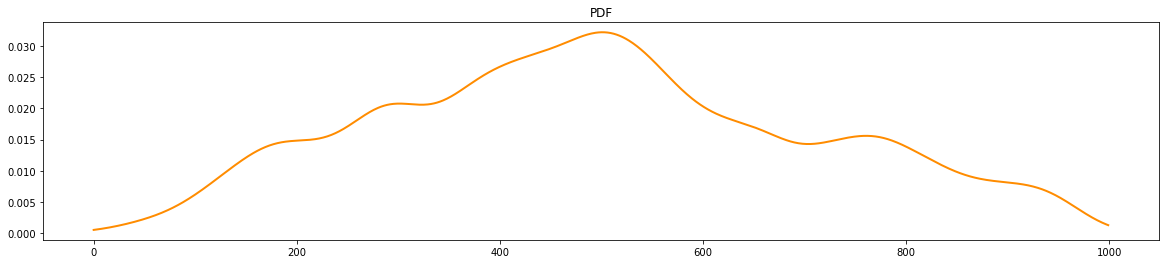

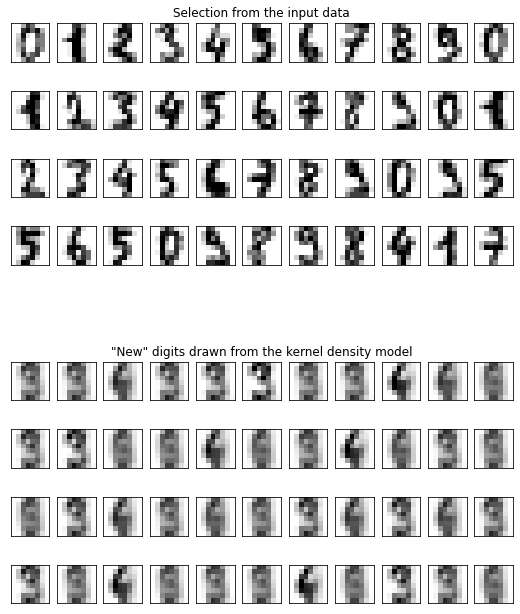

------- Latent Vector Dimensionality =  2  -------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


best bandwidth: 2.3357214690901213


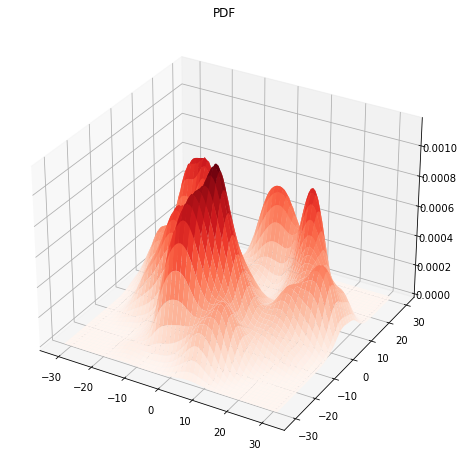

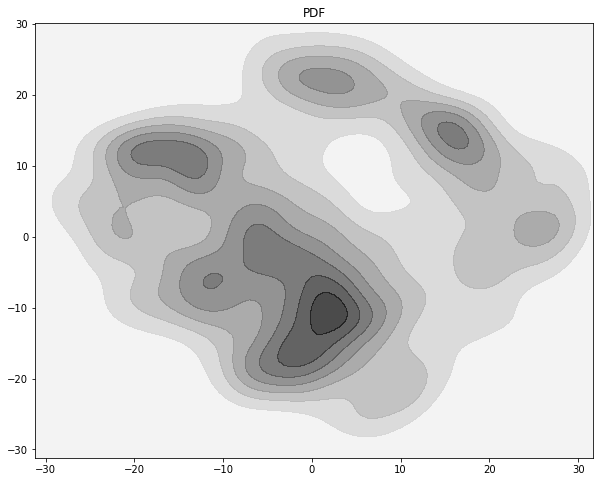

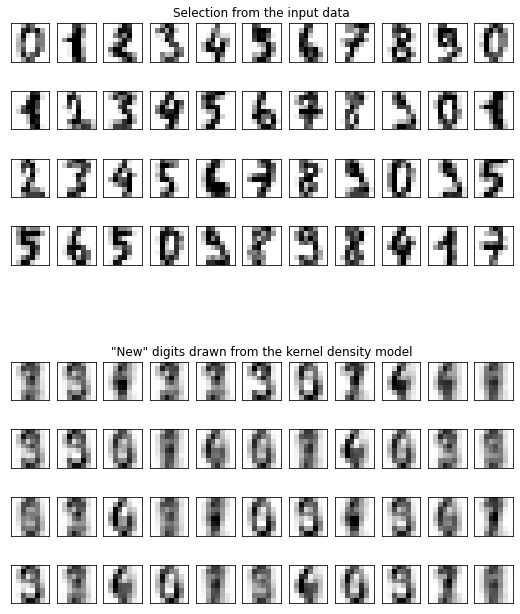

------- Latent Vector Dimensionality =  3  -------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


best bandwidth: 2.9763514416313175
Dimension > 2. Skip PDF visualzation.


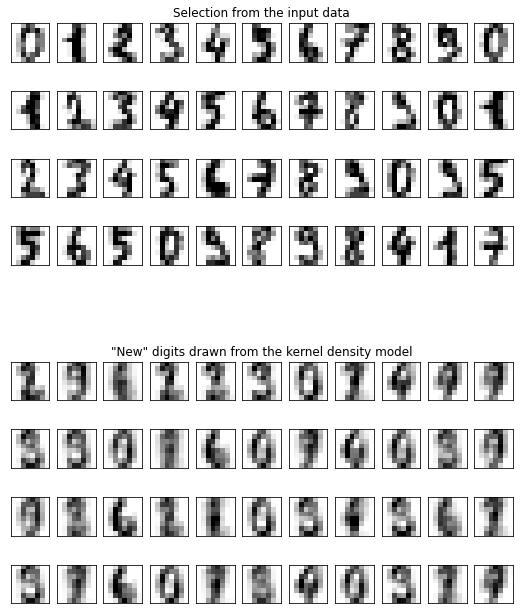

------- Latent Vector Dimensionality =  4  -------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


best bandwidth: 2.9763514416313175
Dimension > 2. Skip PDF visualzation.


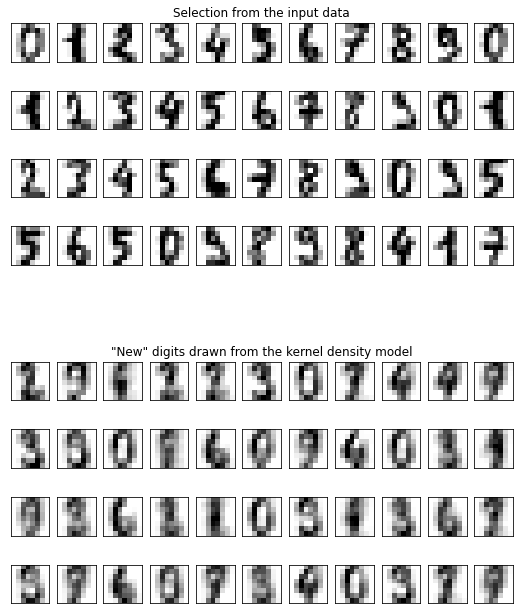

In [28]:
for K in range(1,5):
    print('------- Latent Vector Dimensionality = ', K, ' -------')
    KDE_on_digits(K)

## [Implementation](pykernels-master.zip)

https://github.com/gmum/pykernels



    Vector kernels for R^d
        Linear
        Polynomial
        RBF
        Cosine similarity
        Exponential
        Laplacian
        Rational quadratic
        Inverse multiquadratic
        Cauchy
        T-Student
        ANOVA
        Additive Chi^2
        Chi^2
        MinMax
        Min/Histogram intersection
        Generalized histogram intersection
        Spline
        Sorensen
        Tanimoto
        Wavelet
        Fourier
        Log (CPD)
        Power (CPD)

    Graph kernels

        Labeled
            Shortest paths

        Unlabeled
            Shortest paths
            3,4-Graphlets
            Random walk


## TODO: A theoretical comparison with VAE

## AE + KDE vs VAE 

## Comparison between different kernels in KDE